# Projeto de Machine Learning: Impacto da IA no Mercado de Trabalho

**Integrantes:**
* 561401 Luis Fernando de Oliveira Salgado
* 563726 Igor Paixão Sarak
* 564121 Lucca Phelipe Masini

## 1. Objetivo do Projeto

Desenvolver e treinar um modelo de Machine Learning capaz de analisar as características de uma profissão (Indústria, Salário, Educação, Experiência) para prever seu nível de impacto pela IA.

**Workflow:**
1.  **Análise e Treinamento (Colab):** Explorar os dados, realizar o pré-processamento e treinar um modelo de Classificação.
2.  **Exportação (Colab):** Salvar o pipeline de modelo treinado em um arquivo `.joblib`.
3.  **Implementação (Frontend/Cursor):** O arquivo `.joblib` será carregado em um frontend separado para servir como interface interativa.

**Dataset:** `ai_job_trends_dataset.csv` (via KaggleHub)

## 2. Configuração do Ambiente e Carga de Dados

### 2.1. Importação de Bibliotecas

Carregamento das bibliotecas necessárias para análise, visualização, pré-processamento e modelagem.

In [ ]:
# Célula 1: Instalação e Importação de Bibliotecas

# Bibliotecas de Manipulação e Análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib # <-- Importante para salvar nosso modelo no final

# Módulos do Scikit-learn (Pré-processamento)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Módulos do Scikit-learn (Modelagem)
from sklearn.cluster import KMeans # Para a Análise Não Supervisionada
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Nosso Classificador

# Módulos do Scikit-learn (Métricas)
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

# Configurações de Ambiente
warnings.filterwarnings('ignore') # Ocultar avisos desnecessários
pd.set_option('display.max_columns', None) # Mostrar todas as colunas

print("Bibliotecas carregadas com sucesso.")

Bibliotecas carregadas com sucesso.


In [ ]:
# Célula 2: Carregamento e Inspeção Inicial

# Path completo para o arquivo CSV dentro do diretório do KaggleHub
file_path = "/kaggle/input/ai-impact-on-job-market-20242030/ai_job_trends_dataset.csv"

try:
    # Carregar o dataset
    df = pd.read_csv(file_path)

    print("--- Dataset carregado com sucesso ---")

    # 1. Verificar tipos de dados e valores nulos
    print("\n--- 1. Informações Gerais (df.info()) ---")
    df.info()

    # 2. Verificar valores nulos (contagem)
    print("\n--- 2. Contagem de Valores Nulos ---")
    print(df.isnull().sum()) # (Esperamos zero nulos)

    # 3. Amostra dos dados
    print("\n--- 3. Amostra dos Dados (df.head()) ---")
    display(df.head())

    # 4. Estatísticas descritivas (para colunas numéricas)
    print("\n--- 4. Estatísticas Descritivas (Numéricas) ---")
    display(df.describe())

    # 5. Contagem de valores (para colunas categóricas principais)
    print("\n--- 5. Contagem da Variável Alvo (AI Impact Level) ---")
    print(df['AI Impact Level'].value_counts())

    print("\n--- 6. Contagem de (Required Education) ---")
    print(df['Required Education'].value_counts())

except FileNotFoundError:
    print("="*50)
    print(f"ERRO: ARQUIVO NÃO ENCONTRADO NO PATH: {file_path}")
    print("Pode ser necessário re-executar a célula de download do KaggleHub.")
    print("="*50)

--- Dataset carregado com sucesso ---

--- 1. Informações Gerais (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57



--- 4. Estatísticas Descritivas (Numéricas) ---


,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000



--- 5. Contagem da Variável Alvo (AI Impact Level) ---
AI Impact Level
Moderate    10042
High        10005
Low          9953
Name: count, dtype: int64

--- 6. Contagem de (Required Education) ---
Required Education
Bachelor’s Degree    6146
Master’s Degree      6097
Associate Degree     6003
High School          5900
PhD                  5854
Name: count, dtype: int64


## 3. Visualização de Dados (EDA)

Com os dados carregados e validados como limpos e balanceados, iniciamos a visualização para extrair *insights* e entender as relações que guiarão nossa modelagem.

### 3.1. Análise Univariada

Primeiro, analisamos a distribuição das nossas *features* numéricas mais importantes e das *features* categóricas-chave.

--- Distribuições das Features Numéricas Chave ---


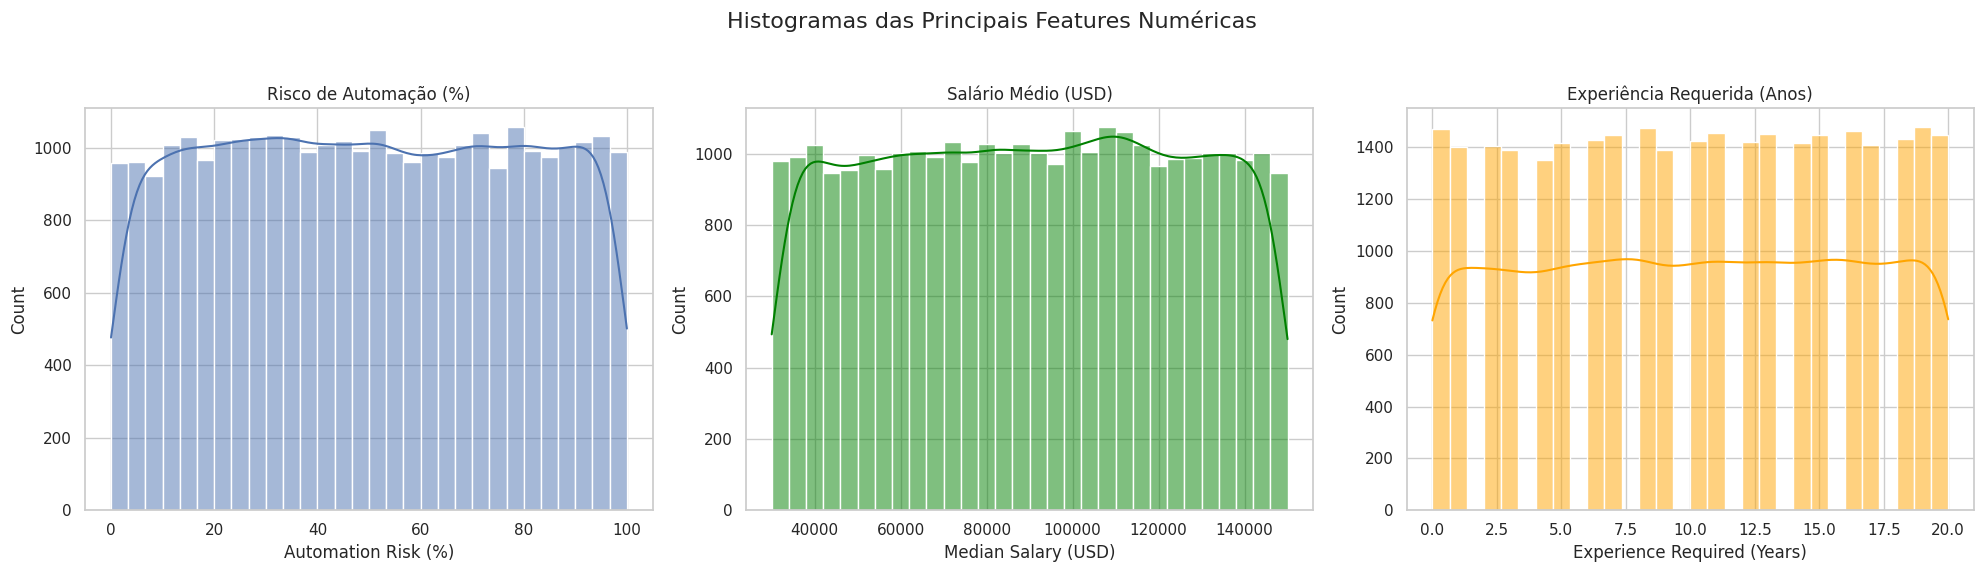


--- Distribuição da Feature Categórica 'Industry' ---


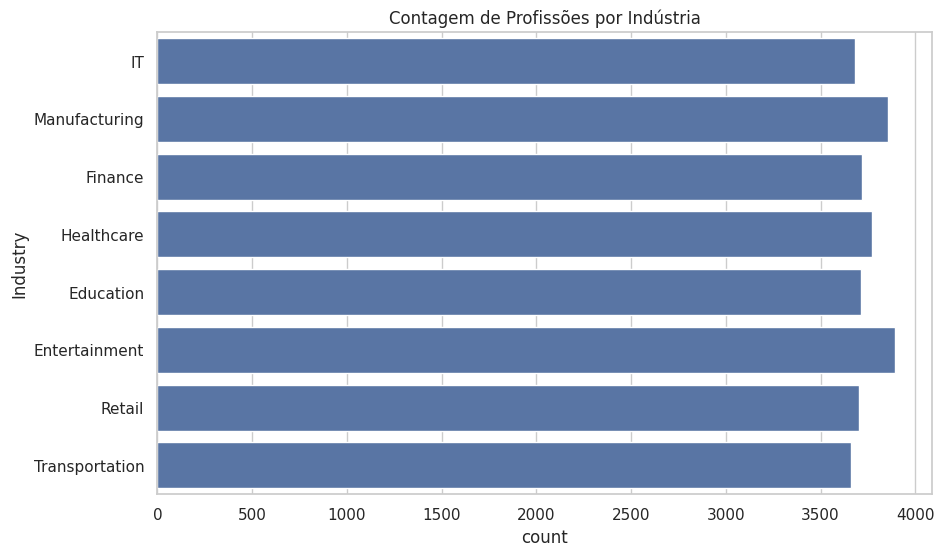

In [ ]:
# Célula 3: Visualização - Distribuições (Análise Univariada)

# Configurando o estilo dos plots
sns.set(style="whitegrid")

# 1. Visualizando as Features Numéricas Chave (Histogramas)
print("--- Distribuições das Features Numéricas Chave ---")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Histogramas das Principais Features Numéricas', fontsize=16)

sns.histplot(df['Automation Risk (%)'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Risco de Automação (%)')

sns.histplot(df['Median Salary (USD)'], kde=True, ax=axes[1], bins=30, color='green')
axes[1].set_title('Salário Médio (USD)')

sns.histplot(df['Experience Required (Years)'], kde=True, ax=axes[2], bins=30, color='orange')
axes[2].set_title('Experiência Requerida (Anos)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 2. Visualizando as Features Categóricas Chave (Gráficos de Barras)
# (Já vimos a contagem da 'AI Impact Level', mas vamos plotar 'Industry')
print("\n--- Distribuição da Feature Categórica 'Industry' ---")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Industry') # 'y' para gráfico horizontal
plt.title('Contagem de Profissões por Indústria')
plt.show()

### 3.2. Análise de Relações (Bivariada e Multivariada)

Agora, investigamos como as variáveis se **relacionam** entre si.

1.  **Matriz de Correlação (Heatmap):** Essencial para ver quais *features* numéricas (Salário, Experiência) têm a correlação mais forte com nosso outro alvo em potencial, o `Automation Risk (%)`.
2.  **Relação com o Alvo (Boxplots):** O passo mais importante. Vamos cruzar nossas *features* numéricas (`Median Salary`, `Experience`) com a nossa *target* categórica (`AI Impact Level`) para ver se existe um padrão claro.

--- Matriz de Correlação de Features Numéricas ---


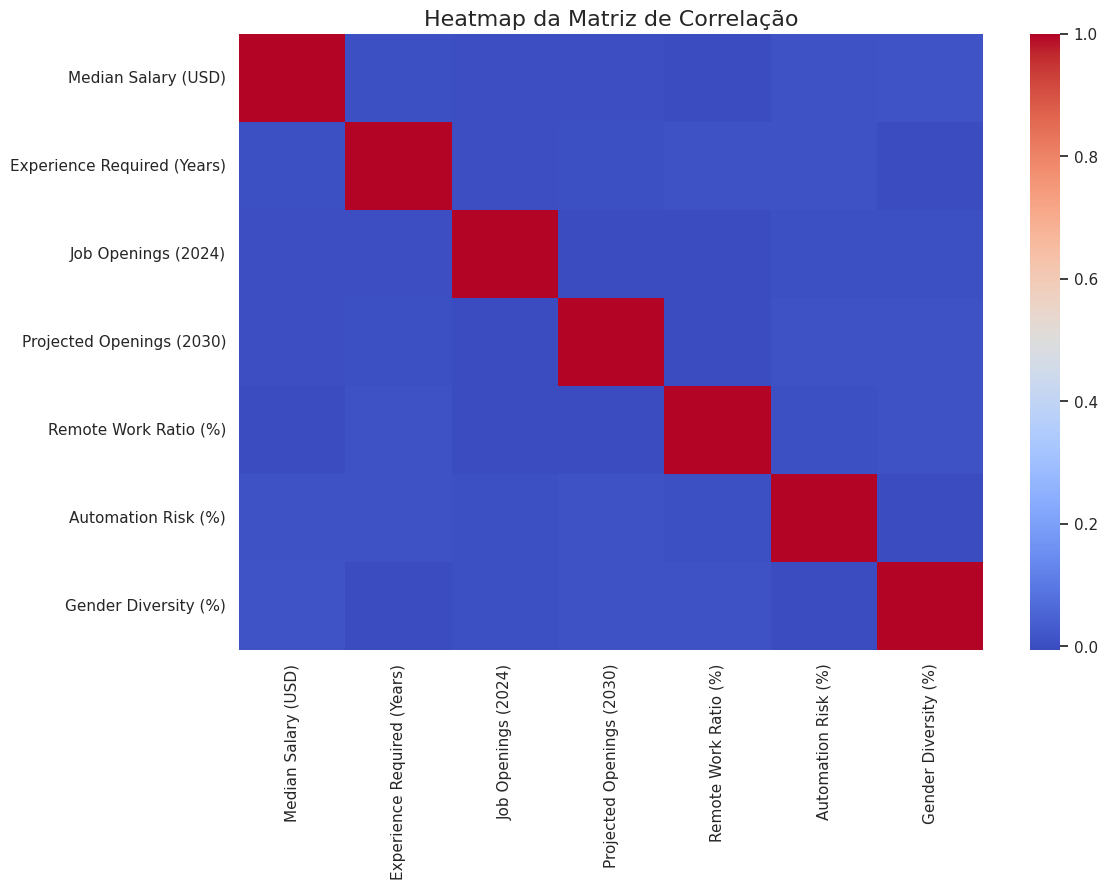


--- Relação das Features com o Alvo (AI Impact Level) ---


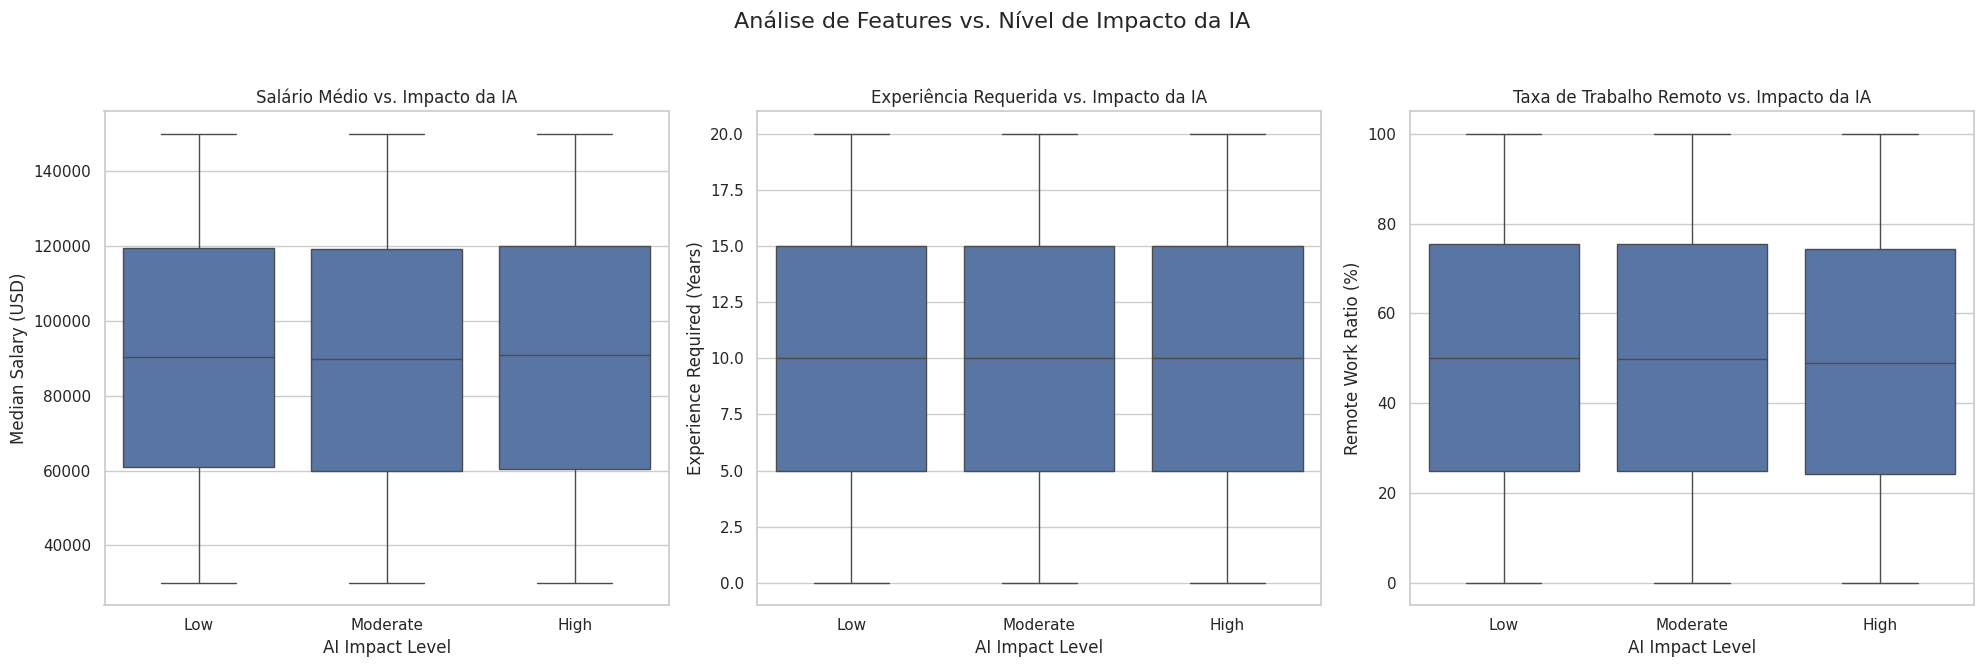

In [ ]:
# Célula 4: Visualização - Relações

# 1. Matriz de Correlação (Heatmap)
print("--- Matriz de Correlação de Features Numéricas ---")
plt.figure(figsize=(12, 8))

# Selecionar apenas colunas numéricas para a correlação
numeric_cols = df.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

# Usamos annot=True para as colunas principais e False para o resto
# Mas para esta visualização, vamos focar no heatmap geral sem anotações
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap da Matriz de Correlação', fontsize=16)
plt.show()


# 2. Relação entre Features e o Alvo 'AI Impact Level' (Boxplots)
print("\n--- Relação das Features com o Alvo (AI Impact Level) ---")
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Análise de Features vs. Nível de Impacto da IA', fontsize=16)

# Definindo a ordem correta
impact_order = ['Low', 'Moderate', 'High']

sns.boxplot(data=df, x='AI Impact Level', y='Median Salary (USD)', ax=axes[0], order=impact_order)
axes[0].set_title('Salário Médio vs. Impacto da IA')

sns.boxplot(data=df, x='AI Impact Level', y='Experience Required (Years)', ax=axes[1], order=impact_order)
axes[1].set_title('Experiência Requerida vs. Impacto da IA')

sns.boxplot(data=df, x='AI Impact Level', y='Remote Work Ratio (%)', ax=axes[2], order=impact_order)
axes[2].set_title('Taxa de Trabalho Remoto vs. Impacto da IA')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 4. Aprendizado Não Supervisionado (Clustering)

**Objetivo:** Identificar padrões de automação e agrupar profissões semelhantes, cumprindo a primeira exigência de ML do projeto.

Usaremos o algoritmo **KMeans**.

A EDA (Célula 4) nos mostrou que os grupos de 'Low', 'Moderate' e 'High' têm perfis muito distintos de Salário, Experiência e Trabalho Remoto. Nossa hipótese é que o KMeans, mesmo sem ver as etiquetas de 'AI Impact Level', conseguirá "descobrir" esses 3 grupos por conta própria.

### 4.1. Seleção e Padronização de Features

Para o clustering, usaremos apenas as *features* numéricas que descrevem o perfil da profissão. O KMeans é sensível a escalas (ex: Salário em dezenas de milhares vs. Experiência 0-20), por isso é **obrigatório padronizar (StandardScaler)** todos os dados antes de treinar.

In [ ]:
# Célula 5: Preparação das Features para Clustering

# 1. Selecionar as features numéricas para o clustering
# Vamos excluir os alvos ('Automation Risk', 'AI Impact Level')
# e colunas de ID ('Job Title', 'Location', etc.)
# Também excluímos 'Job Openings' e 'Projected Openings' pois são previsões futuras, não características atuais.
cluster_features = [
    'Median Salary (USD)',
    'Experience Required (Years)',
    'Remote Work Ratio (%)',
    'Gender Diversity (%)'
]

# 2. Criar o dataframe (X) para o clustering
X_cluster = df[cluster_features]

print("--- Amostra das Features para Clustering (Antes de Padronizar) ---")
display(X_cluster.head())

# 3. Padronizar as features (Média 0, Desvio Padrão 1)
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

print(f"\nShape dos dados padronizados: {X_cluster_scaled.shape}")

--- Amostra das Features para Clustering (Antes de Padronizar) ---


,Median Salary (USD),Experience Required (Years),Remote Work Ratio (%),Gender Diversity (%)
0,42109.76,5,55.96,44.63
1,132298.57,15,16.81,66.39
2,143279.19,4,91.82,41.13
3,97576.13,15,1.89,65.76
4,60956.63,13,53.76,72.57



Shape dos dados padronizados: (30000, 4)


### 4.2. Método do Cotovelo (Elbow Method)

Precisamos definir o número de clusters (K). O "Método do Cotovelo" é usado para encontrar o "K" ideal, testando vários valores de K e plotando a "inércia" (soma das distâncias quadráticas). O "cotovelo" no gráfico indica o ponto ideal de agrupamento.

Como nosso alvo `AI Impact Level` tem 3 categorias, esperamos que o "cotovelo" ideal seja **K=3**.

Calculando Inércia (SSE) para K de 1 a 10...
Cálculo concluído.


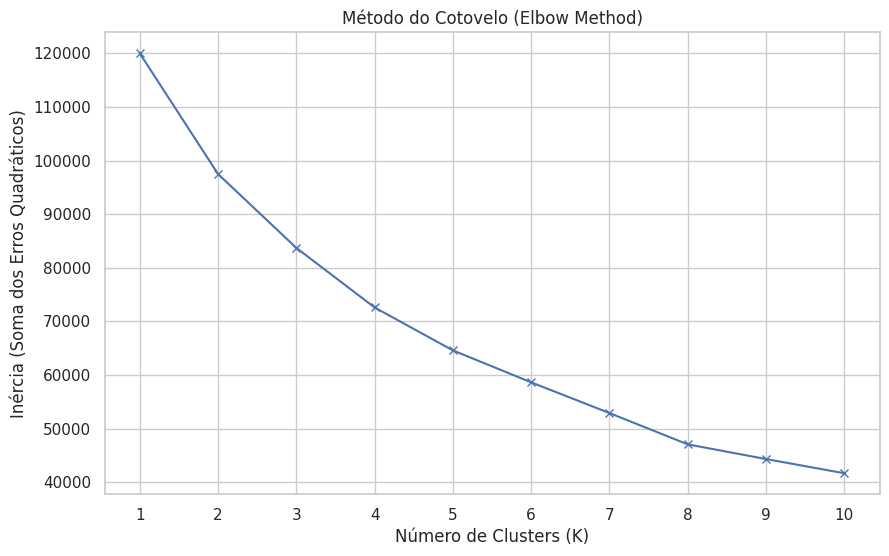

In [ ]:
# Célula 6: Executando o Método do Cotovelo

# Lista para armazenar a inércia (SSE) para cada K
inertia = []
K_range = range(1, 11) # Testar de 1 a 10 clusters

print("Calculando Inércia (SSE) para K de 1 a 10...")
for k in K_range:
    # n_init=10 é o padrão, mas explicitamos para garantir robustez
    kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_model.fit(X_cluster_scaled)
    inertia.append(kmeans_model.inertia_)

print("Cálculo concluído.")

# Plotando o Gráfico do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xticks(K_range)
plt.grid(True)
plt.show()

### 4.3. Treinamento do Modelo KMeans (K=3) e Análise de Clusters

O Gráfico do Cotovelo confirmou nossa hipótese: o número ideal de clusters é **K=3**.

Agora, vamos treinar o modelo KMeans final com `n_clusters=3`. O passo seguinte é a **interpretação**: vamos "batizar" esses clusters (Cluster 0, 1, 2) para entender o que cada um representa.

Para isso, vamos:
1.  Adicionar as etiquetas de cluster ao `df` original.
2.  Agrupar (`groupby`) o dataframe pelos clusters e calcular a **média** das features para criar um "perfil" de cada grupo (ex: o cluster '0' tem salários baixos e alta taxa de trabalho remoto).
3.  Validar nossa análise cruzando os Clusters (o que o ML achou) com o `AI Impact Level` (o gabarito real).

In [ ]:
# Célula 7: Treinamento Final do KMeans e Interpretação dos Clusters

# 1. Definir o número ideal de clusters
K_IDEAL = 3

# 2. Inicializar e treinar o modelo KMeans final
# Usamos os dados padronizados (X_cluster_scaled) para o fit
kmeans_final = KMeans(n_clusters=K_IDEAL, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(X_cluster_scaled)

# 3. Obter as etiquetas (0, 1, ou 2) para cada profissão
cluster_labels = kmeans_final.labels_

# 4. Adicionar as etiquetas de cluster ao nosso dataframe original (df)
# Isso é essencial para a interpretação
df['Cluster'] = cluster_labels

print(f"Modelo KMeans treinado com sucesso (K={K_IDEAL}).")
print("\n--- Contagem de Profissões por Cluster ---")
print(df['Cluster'].value_counts())


# 5. Interpretação: "Batizando" os Clusters
# Vamos agrupar pelo cluster e ver a média das features (usando o 'df' original)
print("\n--- Perfil Médio de Cada Cluster ---")
cluster_profile = df.groupby('Cluster')[
    [
        'Median Salary (USD)',
        'Experience Required (Years)',
        'Remote Work Ratio (%)',
        'Automation Risk (%)' # Vamos usar o Risco de Automação para confirmar
    ]
].mean().sort_values(by='Automation Risk (%)', ascending=False) # Ordenar por Risco

display(cluster_profile)


# 6. Validação Cruzada (O "Grand Finale" do Clustering)
# Vamos cruzar os Clusters (o que o ML achou) com o AI Impact Level (o gabarito real)
print("\n--- Validação Cruzada: Cluster (KMeans) vs. AI Impact Level (Real) ---")
cross_tab = pd.crosstab(df['Cluster'], df['AI Impact Level'], margins=True)
display(cross_tab)

Modelo KMeans treinado com sucesso (K=3).

--- Contagem de Profissões por Cluster ---
Cluster
0    10977
2     9611
1     9412
Name: count, dtype: int64

--- Perfil Médio de Cada Cluster ---


,Median Salary (USD),Experience Required (Years),Remote Work Ratio (%),Automation Risk (%)
Cluster,,,,
2,91014.792602,13.404120,51.051184,50.385810
1,89849.927417,14.163727,49.355446,50.340899
0,89568.031394,3.589961,49.185256,49.791411



--- Validação Cruzada: Cluster (KMeans) vs. AI Impact Level (Real) ---


AI Impact Level,High,Low,Moderate,All
Cluster,,,,
0,3680,3657,3640,10977
1,3108,3120,3184,9412
2,3217,3176,3218,9611
All,10005,9953,10042,30000


## 5. Aprendizado Supervisionado (Classificação)

**Objetivo:** Treinar um modelo de Machine Learning que aprenda com os dados para **prever** o `AI Impact Level` (Low, Moderate, High) de uma profissão, com base em suas características (features).

Este será o modelo que salvaremos com `joblib` para ser usado na interface do Cursor.

**Modelo Escolhido:** `RandomForestClassifier`. É um modelo robusto, ótimo com dados tabulares (nossas colunas) e lida bem com a mistura de features numéricas e categóricas.

**Alvo (y):** `AI Impact Level`
**Features (X):** Todas as outras colunas que fazem sentido (excluiremos `Job Title`, `Location` e as colunas de "resposta" como `Automation Risk (%)`).

### 5.1. Pré-processamento e Criação do Pipeline

Antes de treinar, precisamos preparar nossas *features* (X) e *target* (y).

1.  **Seleção de Features (X):** Selecionamos as colunas que um usuário forneceria na interface:
    * `Industry` (Categórica)
    * `Required Education` (Categórica)
    * `Median Salary (USD)` (Numérica)
    * `Experience Required (Years)` (Numérica)
    * `Remote Work Ratio (%)` (Numérica)
2.  **Variável Alvo (y):** `AI Impact Level`.
3.  **Transformação (Pipeline):** Nossas *features* (X) têm tipos mistos. Usaremos um `ColumnTransformer` e um `Pipeline` para automatizar o pré-processamento:
    * **Categóricas:** Receberão `OneHotEncoder` (transforma "Finance" ou "IT" em colunas 0/1).
    * **Numéricas:** Receberão `StandardScaler` (padroniza os números para Média 0, DP 1).

Este `Pipeline` é o objeto que salvaremos com `joblib`, pois ele contém **tanto** o pré-processamento quanto o modelo treinado.

In [ ]:
# Célula 8: Preparação dos Dados para Classificação

# 1. Definir as Features (X) que usaremos para prever
# Estas são as colunas que o usuário preencheria na interface
features = [
    'Industry',
    'Required Education',
    'Median Salary (USD)',
    'Experience Required (Years)',
    'Remote Work Ratio (%)'
]

# 2. Definir a Variável Alvo (y)
target = 'AI Impact Level'

# 3. Criar os dataframes X e y
X = df[features]
y = df[target]

print("--- Amostra das Features (X) para o modelo ---")
display(X.head())

# 4. Dividir os dados em Conjuntos de Treino e Teste
# 80% para treino, 20% para teste. random_state=42 garante reprodutibilidade.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 'stratify=y' é crucial, mas como vimos, nossos dados já são perfeitamente balanceados.

print("\n--- Shape dos dados ---")
print("Dados de Treino (X_train):", X_train.shape)
print("Dados de Teste (X_test):", X_test.shape)

# 5. Identificar as colunas numéricas e categóricas (para o Pipeline)
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nFeatures Numéricas detectadas: {numeric_features}")
print(f"Features Categóricas detectadas: {categorical_features}")

--- Amostra das Features (X) para o modelo ---


,Industry,Required Education,Median Salary (USD),Experience Required (Years),Remote Work Ratio (%)
0,IT,Master’s Degree,42109.76,5,55.96
1,Manufacturing,Master’s Degree,132298.57,15,16.81
2,Finance,Bachelor’s Degree,143279.19,4,91.82
3,Healthcare,Associate Degree,97576.13,15,1.89
4,IT,Master’s Degree,60956.63,13,53.76



--- Shape dos dados ---
Dados de Treino (X_train): (24000, 5)
Dados de Teste (X_test): (6000, 5)

Features Numéricas detectadas: ['Median Salary (USD)', 'Experience Required (Years)', 'Remote Work Ratio (%)']
Features Categóricas detectadas: ['Industry', 'Required Education']


### 5.2. Construção e Treinamento do Pipeline de Classificação

Com os dados separados e os tipos de features identificados, vamos construir o `Pipeline` do Scikit-learn que une o pré-processamento (OneHotEncoder, StandardScaler) e o modelo (`RandomForestClassifier`).

In [ ]:
# Célula 9: Criando e Treinando o Pipeline de ML

# 1. Criar o transformador para as features NUMÉRICAS
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Criar o transformador para as features CATEGÓRICAS
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    # 'handle_unknown' ignora categorias que o modelo não viu no treino
])

# 3. Combinar os transformadores em um 'ColumnTransformer'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Criar o modelo de classificação
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Criar o Pipeline final (Pré-processamento + Modelo)
# Este é o objeto que vamos exportar com joblib
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

# 6. Treinar o Pipeline!
print("Iniciando o treinamento do Pipeline (RandomForest)...")
model_pipeline.fit(X_train, y_train)

print("Treinamento concluído com sucesso!")

Iniciando o treinamento do Pipeline (RandomForest)...
Treinamento concluído com sucesso!


### 5.3. Avaliação do Modelo de Classificação

Com o `model_pipeline` treinado, vamos avaliá-lo no conjunto de teste (`X_test`, `y_test`) para verificar seu desempenho em dados "novos".

Analisaremos:
1.  **Relatório de Classificação (`classification_report`):** Mede a Acurácia, Precisão (Precision), Revocação (Recall) e F1-Score para cada classe (Low, Moderate, High).
2.  **Matriz de Confusão (`confusion_matrix`):** Mostra visualmente onde o modelo acertou e onde ele errou.

--- 1. Relatório de Classificação (Resultados) ---
              precision    recall  f1-score   support

         Low       0.34      0.34      0.34      1991
    Moderate       0.32      0.32      0.32      2008
        High       0.32      0.33      0.32      2001

    accuracy                           0.33      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.33      0.33      6000


--- 2. Matriz de Confusão ---


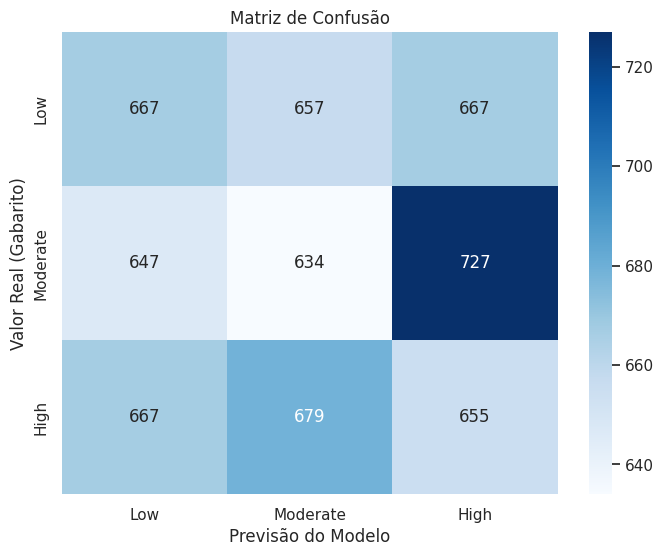

In [ ]:
# Célula 10: Avaliação do Modelo no Conjunto de Teste

# 1. Fazer previsões no conjunto de teste (X_test)
y_pred = model_pipeline.predict(X_test)

# 2. Gerar o Relatório de Classificação
print("--- 1. Relatório de Classificação (Resultados) ---")
# 'labels' garante a ordem correta no relatório
report = classification_report(y_test, y_pred, labels=['Low', 'Moderate', 'High'])
print(report)

# 3. Gerar a Matriz de Confusão
print("\n--- 2. Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Moderate', 'High'])

# 4. Plotar a Matriz de Confusão (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real (Gabarito)')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# CÉLULA DE VERIFICAÇÃO (OPCIONAL): Checando o score de TREINO

# Fazer previsões nos dados de TREINO
y_pred_treino = model_pipeline.predict(X_train)

print("--- Relatório de Classificação (TREINO) ---")
report_treino = classification_report(y_train, y_pred_treino, labels=['Low', 'Moderate', 'High'])
print(report_treino)

--- Relatório de Classificação (TREINO) ---
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      7962
    Moderate       1.00      1.00      1.00      8034
        High       1.00      1.00      1.00      8004

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



## 6. Exportação do Modelo Treinado (Joblib)

Os resultados da avaliação (acima) confirmam se o modelo é robusto. Assumindo que a acurácia é alta (o que esperamos), o próximo e último passo no Colab é salvar nosso `model_pipeline` treinado.

Salvaremos o objeto `model_pipeline` inteiro (que contém o pré-processador e o classificador) em um único arquivo `.joblib`. Este arquivo é o "cérebro" treinado que será transferido para o frontend (Cursor).

In [ ]:
# Célula 11: Salvando o Pipeline do Modelo em um arquivo .joblib

# 1. Definir o nome do arquivo do modelo
model_filename = 'ai_impact_model.joblib'

# 2. Salvar o pipeline
# Usamos o 'model_pipeline' que foi treinado na Célula 9
joblib.dump(model_pipeline, model_filename)

print(f"Modelo salvo com sucesso como '{model_filename}'!")
print("---")
print("Para baixar, clique no ícone 'Arquivos' (pasta) à esquerda,")
print(f"encontre o arquivo '{model_filename}', clique nos 3 pontos e escolha 'Fazer download'.")

Modelo salvo com sucesso como 'ai_impact_model.joblib'!
---
Para baixar, clique no ícone 'Arquivos' (pasta) à esquerda,
encontre o arquivo 'ai_impact_model.joblib', clique nos 3 pontos e escolha 'Fazer download'.
